#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

(1000, 1)


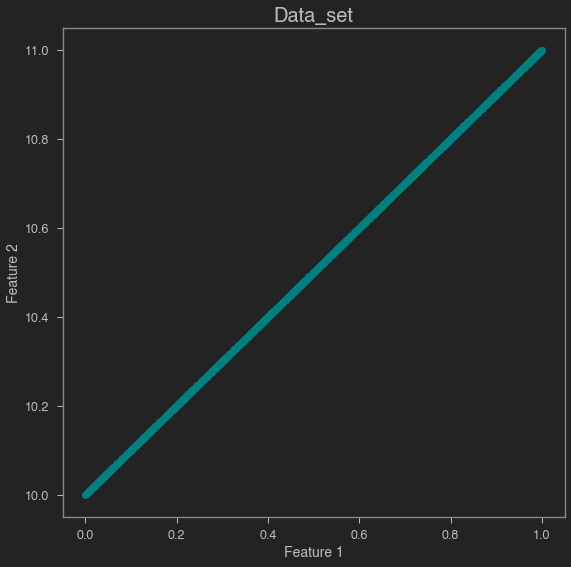

In [2]:
## Write your code here
#Generation of points
w = [10,1]
#Generating our data points
x = np.linspace(0,1,1000)
x = np.reshape(x,(1000,1))
#Equation of line
y = w[0] + w[1]*x
#Plotting our equation
plt.figure(figsize=[9,9])
plt.scatter(x,y,marker='o',color='teal')
plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);
print(y.shape)

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

In [3]:
## Write your code here
#Adding noise to our data
noise = np.random.rand(1000,1)
y = y+(noise*.1)
print(y.shape)

(1000, 1)


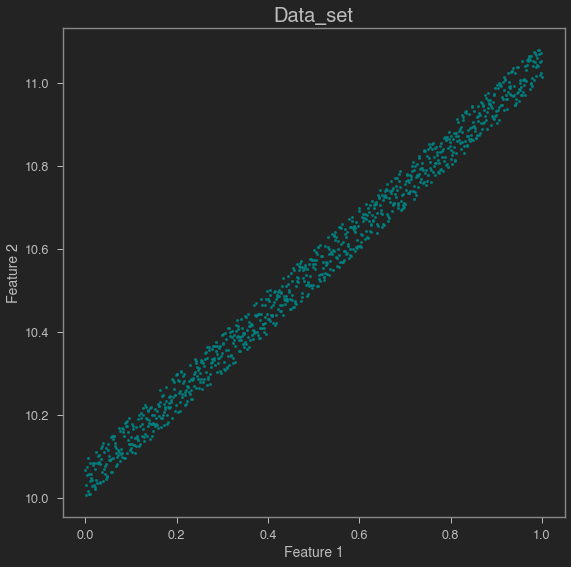

In [4]:
#Plotting noisy dataset
plt.figure(figsize=[9,9])
plt.scatter(x,y,marker='o',s=7,color='teal')
plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

Optimal Value: [1.07807808]


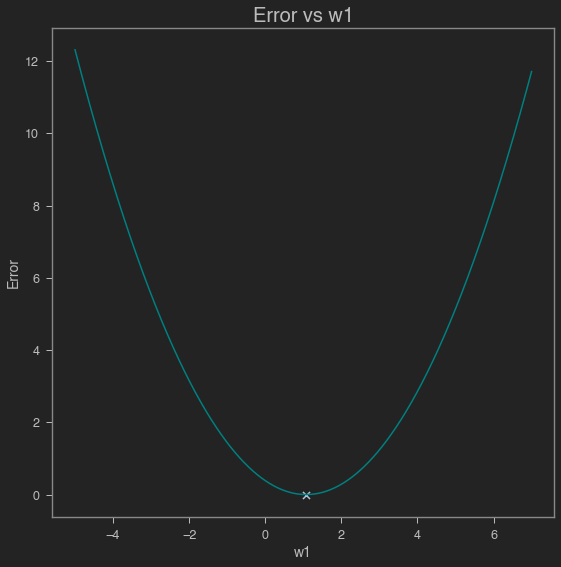

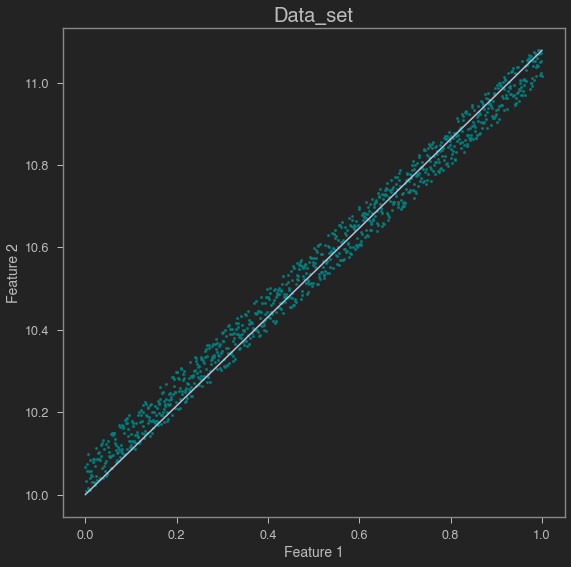

In [5]:
## Write your code here
#Declaring random values for weights
w1 = np.linspace(-5,7,1000)
w1 = np.reshape(w1,(1000,1))
#Declaring a predicted array
y_pred = np.array([])
y_pred = x@w1.T + 10

#Calculation of error using predicted and original values
error = (y_pred - y)**2
error = np.average(error,axis = 0)
print("Optimal Value:",w1[np.argmin(error)])

opt = w1[np.argmin(error)]
opt_err = np.min(error)

#Plotting the error
plt.figure(figsize=[9,9])
plt.plot(w1,error,c='teal')
plt.scatter(opt,opt_err,marker='x',s=50,color='lightsteelblue')
plt.title('Error vs w1',fontsize=20);
plt.xlabel('w1',fontsize=14);
plt.ylabel('Error',fontsize=14);

y_cor = 10 + w1[np.argmin(error)]*x
#Plotting the best fit line
plt.figure(figsize=[9,9])
plt.scatter(x,y,marker='o',s=7,color='teal')
plt.plot(x,y_cor,c='lightsteelblue')

plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

1.0752838771472712


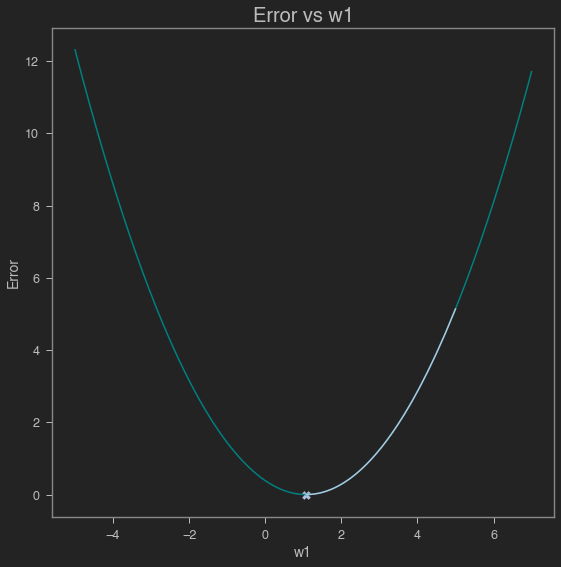

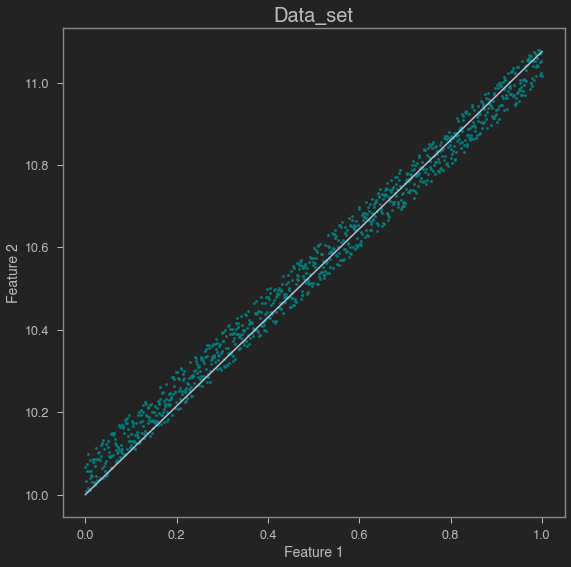

In [6]:
## Write your code here
#Declaring initial values for algorithm
w_o = 10
w_1 = 5
#Declaring learning rate
alpha = 0.1
#Decalaring stopping condition
stp = 1e-5
prev = 1
err = np.array([])
weigh = np.array([])
#Start of logic
while prev > stp:
    err = np.append(err,np.average((y-(w_o + w_1*x))**2))
    d_err = -2*np.average((y-(w_o + w_1*x))*x)     #Calculation of gradient
    tmp = w_1
    weigh = np.append(weigh,w_1)    #Updation of our weights
    w_1 -= alpha*d_err        
    prev = abs(w_1-tmp)     #Checking of stopping condition
print(tmp)
y_cor = w_o + tmp*x

#Plotting error and gradient descent steps
plt.figure(figsize=[9,9])
plt.plot(w1,error,c='teal')
plt.plot(weigh,err,color='lightsteelblue')
plt.scatter(tmp,err[len(err)-1],marker='X',s=70,color='lightsteelblue')
plt.title('Error vs w1',fontsize=20);
plt.xlabel('w1',fontsize=14);
plt.ylabel('Error',fontsize=14);

#Plotting best fit line
plt.figure(figsize=[9,9])
plt.scatter(x,y,marker='o',s=7,color='teal')
plt.plot(x,y_cor,color='lightsteelblue')

plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

(1000, 1)


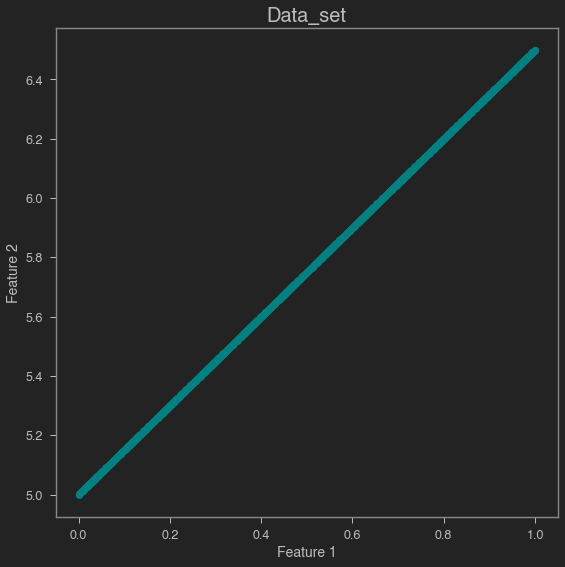

In [7]:
## Write your code here
#Gereration of equation of line
w = [5,1.5]
x = np.linspace(0,1,1000)
x = np.reshape(x,(1000,1))
#Plotting our equation
y = w[0] + w[1]*x
plt.figure(figsize=[9,9])
plt.scatter(x,y,marker='o',color='teal')
plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);
print(y.shape)

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

In [8]:
## Write your code here
#Generating noise around our dataset
noise = np.random.rand(1000,1)
y = y+(noise*.1)
print(y.shape)

(1000, 1)


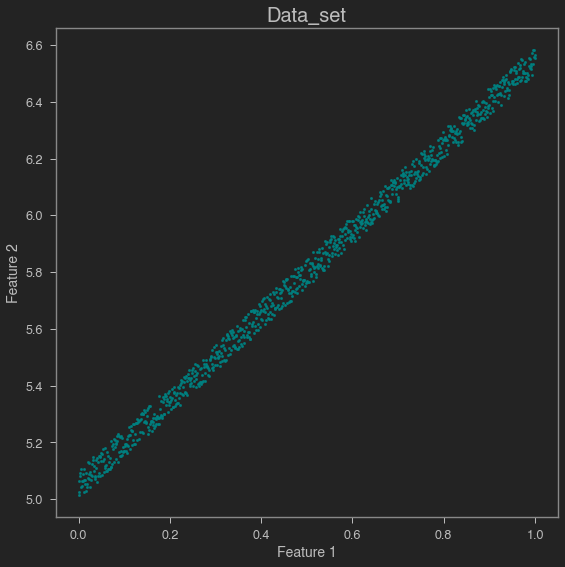

In [9]:
#Plotting noisy dataset
plt.figure(figsize=[9,9])
plt.scatter(x,y,marker='o',s=7,color='teal')
plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

<Figure size 576x504 with 0 Axes>

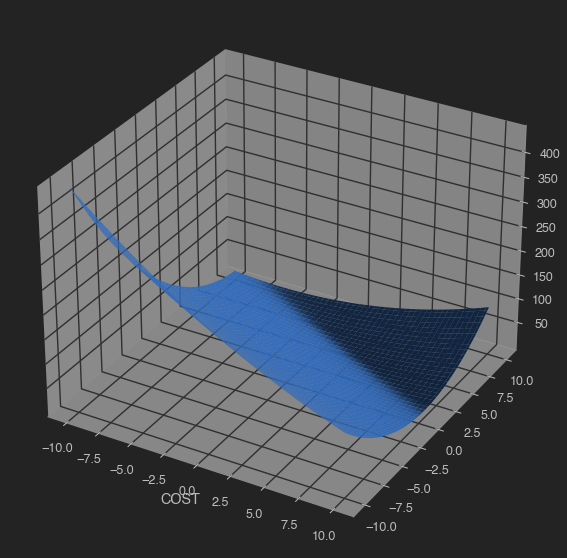

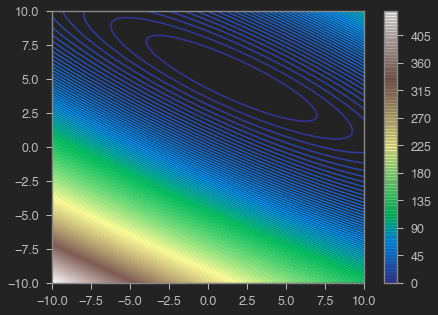

In [10]:
## Write your code here
#Declaring weights for error surface
w_1 = np.linspace(-10,10,100)
w_0 = np.linspace(-10,10,100)
#Forming a meshgrid
W_0,W_1 = np.meshgrid(w_0,w_1)
cost = np.array([])
#Finding the cost/loss function for our curve
for i in range(len(w_1)):
    for j in range(len(w_0)):
        cost = np.append(cost,np.average((y-W_0[i][j]-W_1[i][j]*x)**2))
        
cost = np.reshape(cost,(100,100))

#Plotting cost curve
fig = plt.figure()
plt.figure(figsize = [10,10])
ax = plt.axes(projection ='3d')
ax.plot_surface(W_1,W_0,cost)
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_xlabel("COST")

#Plotting contours
plt.figure(figsize = [7,5])
plt.contour(W_1,W_0,cost,200,cmap='terrain')
plt.colorbar()

**Gradient Descent to find optimal Values**

Optimal Values: 
w0: 1.5035481280610103 
w1: 5.04774245200231


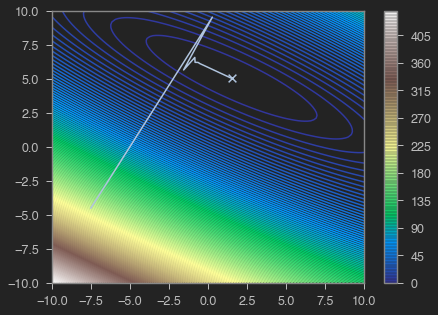

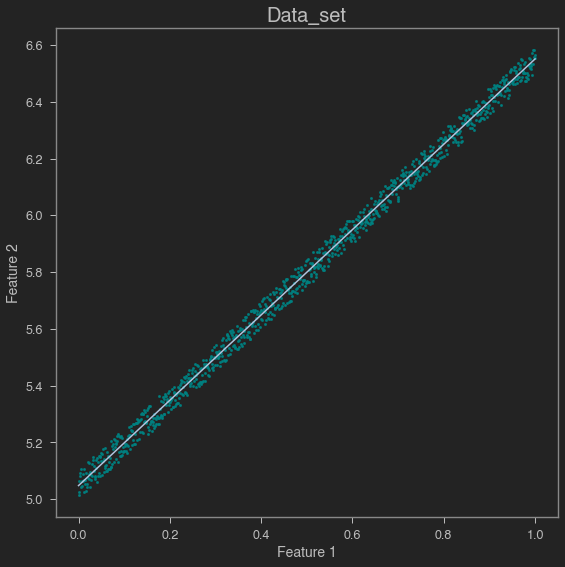

In [11]:
## Write your code here
#Initialising to start the algorithm
w_o = -4.5
w_1 = -7.5
#Initialising learning rate
alpha = 0.5
#Stopping condition 
stp = 1e-6
prev = 1
err = np.array([])
weigh1 = np.array([])
weigh2 = np.array([])
#Start of our logic
while prev > stp:
    err = np.append(err,np.average((y-(w_o + w_1*x))**2))
    d_err = -2*np.average((y-(w_o + w_1*x))*x)   #Calculating gradient at the current weigths
    tmp1 = w_1
    weigh1 = np.append(weigh1,w_1)
    
    d_err1 = -2*np.average((y-(w_o + w_1*x)))   #Calculating gradient at the current weigths
    tmp2 = w_o
    weigh2 = np.append(weigh2,w_o)
    #Updating weights using obtained value of gradients
    w_o -= alpha*d_err1    
    w_1 -= alpha*d_err
    prev = abs(np.sqrt((w_1-tmp1)**2+(tmp2-w_o)**2))
print("Optimal Values:","\nw0:",tmp1,"\nw1:",tmp2)
y_cor = tmp2 + tmp1*x

#Plotting gradient descent
plt.figure(figsize = [7,5])
plt.contour(W_1,W_0,cost,200,cmap='terrain')
plt.colorbar()
plt.plot(weigh1,weigh2,'lightsteelblue')
plt.scatter(tmp1,tmp2,color='lightsteelblue',marker = 'x',s=60)
plt.show()

#Plotting the best fit curve
plt.figure(figsize=[9,9])
plt.scatter(x,y,marker='o',s=7,color='teal')
plt.plot(x,y_cor,color='lightsteelblue')

plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

(30, 30)


Text(0.5, 0, 'Z')

<Figure size 576x504 with 0 Axes>

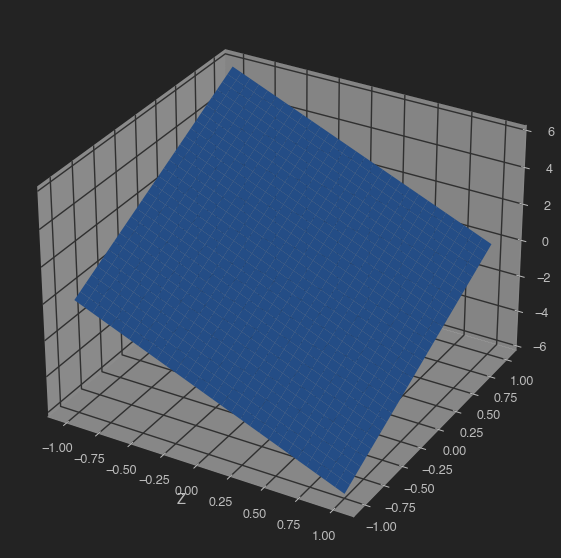

<Figure size 576x504 with 0 Axes>

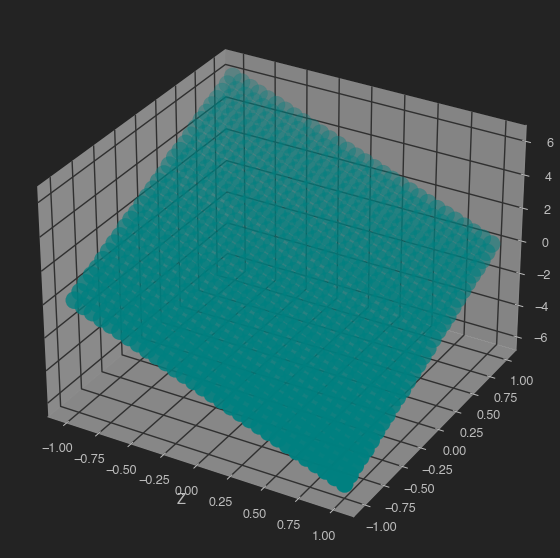

In [12]:
## Write your code here
x1 = np.linspace(-1,1,30)
x2 = np.linspace(-1,1,30)
x1 = np.reshape(x1,(30,1))
x2 = np.reshape(x2,(30,1))
X1,X2 = np.meshgrid(x1,x2)
z =  - 3*X1 + 3*X2
fig = plt.figure()
plt.figure(figsize = [10,10])
ax = plt.axes(projection ='3d')
ax.plot_surface(X1,X2,z)
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_xlabel("Z")
noise = np.random.uniform(0,1,(30,1))
z = z+(0.1*noise)
print(z.shape)
fig = plt.figure()
plt.figure(figsize = [10,10])
ax = plt.axes(projection ='3d')
ax.scatter3D(X1,X2,z,s=300,color="teal")
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_xlabel("Z")

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

<Figure size 576x504 with 0 Axes>

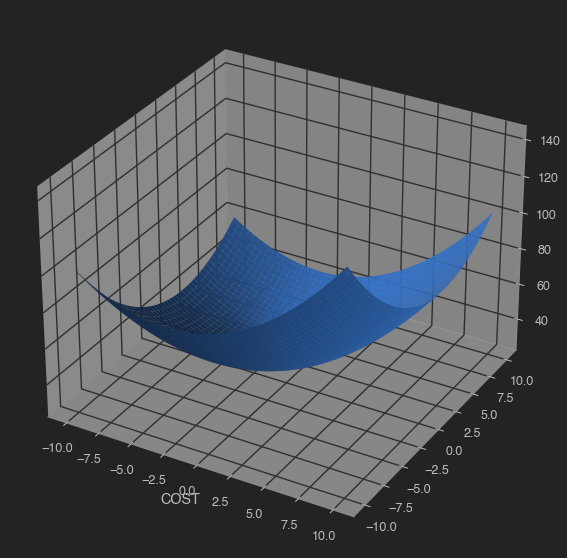

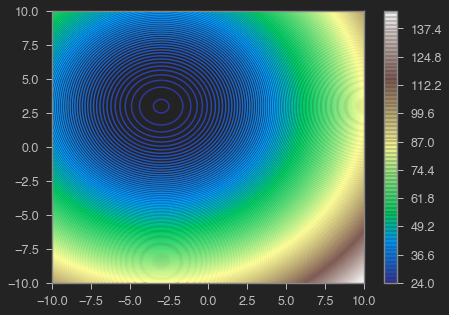

In [13]:
## Write your code here
w_1 = np.linspace(-10,10,100)
w_0 = np.linspace(-10,10,100)
W_0,W_1 = np.meshgrid(w_0,w_1)
cost = np.array([])
for i in range(len(w_1)):
    for j in range(len(w_0)):
        cost = np.append(cost,np.average((z-5-W_0[i][j]*X1-W_1[i][j]*X2)**2))
        
cost = np.reshape(cost,(100,100))
fig = plt.figure()
plt.figure(figsize = [10,10])
ax = plt.axes(projection ='3d')
ax.plot_surface(W_0,W_1,cost)
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_xlabel("COST")

plt.figure(figsize = [7,5])
plt.contour(W_0,W_1,cost,200,cmap='terrain')
plt.colorbar()

**Prediction using Gradient Descent**

Optimal Values: 
w1: -2.9999992975619985 
w2: 3.001017661169284


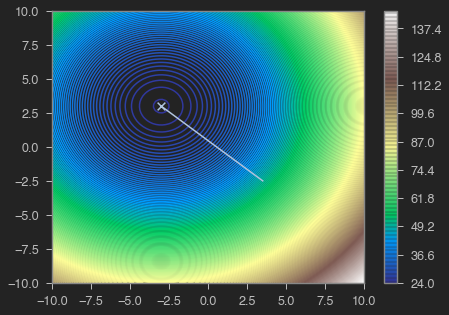

Text(0.5, 0, 'Z')

<Figure size 576x504 with 0 Axes>

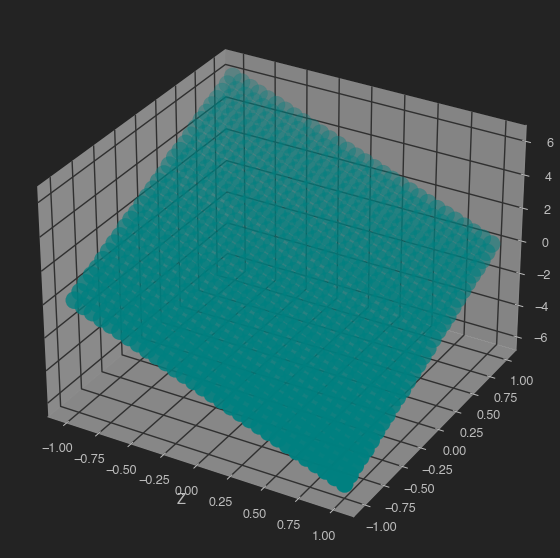

In [14]:
## Write your code here
w_1 = 3.5
w_2 = -2.5
alpha = 0.8
stp = 1e-6
prev = 1
err = np.array([])
weigh1 = np.array([])
weigh2 = np.array([])
while prev > stp:
    err = np.append(err,np.average((z-(5 + w_1*X1+w_2*X2))**2))
    d_err = -2*np.average((z-(w_1*X1 + w_2*X2))*X1)
    tmp1 = w_1
    weigh1 = np.append(weigh1,w_1)
    
    d_err1 = -2*np.average((z-(5+w_1*X1 + w_2*X2))*X2)
    tmp2 = w_2
    weigh2 = np.append(weigh2,w_2)
    
    w_1 -= alpha*d_err
    w_2 -= alpha*d_err1
    prev = abs(np.sqrt((w_1-tmp1)**2+(tmp2-w_2)**2))
print("Optimal Values:","\nw1:",tmp1,"\nw2:",tmp2)
y_cor = 5+tmp1*X1 + tmp2*X2

plt.figure(figsize = [7,5])
plt.contour(W_0,W_1,cost,200,cmap='terrain')
plt.colorbar()
plt.plot(weigh1,weigh2,'lightsteelblue')
plt.scatter(tmp1,tmp2,color='lightsteelblue',marker = 'x',s=60)
plt.show()
fig = plt.figure()
plt.figure(figsize = [10,10])
ax = plt.axes(projection ='3d')
ax.scatter3D(X1,X2,z,s=300,color="teal")
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_xlabel("Z")

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
Optimal Weights obtained by Normal Equation:
 [[-6.30951203]
 [ 2.90112904]
 [-8.41527787]
 [-3.88302037]
 [ 4.65831048]
 [-0.55865604]]
Optimal Weights obtained by Gradient Descent:
 [[-6.30683199]
 [ 2.89867523]
 [-8.41270035]
 [-3.88389654]
 [ 4.66028912]
 [-0.55857374]]


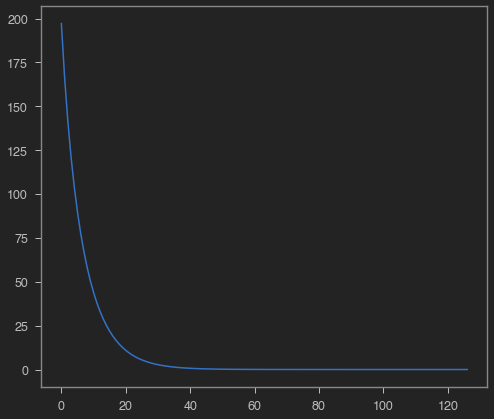

In [15]:
class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        #write code here
        w_new = w_old + 2*lr*(x@(y-((x.T)@w_old)))/x.shape[1]
        return w_new

    def error(self,w,y,x):
        err = np.average((y-(x.T@ w))**2)
        return err# write code here
    def mat_inv(self,y,x_aug):
        w_opt = np.linalg.pinv(x_aug@x_aug.T)@(x_aug@y)
        return w_opt# write code here

      # By Gradient descent

    def Regression_grad_des(self,x,y,lr):
        w = np.random.uniform(-10,10,size=(6,1))
        err = np.array([])
        for i in range(1000):
          # write code here
            err = np.append(err,reg.error(w,y,x))
            w = reg.grad_update(w,lr,y,x)
            dev=np.abs(err[-1]-reg.error(w,y,x))# write code here)
              # print(i)
            if dev<=0.000001:
                break
            w_pred = w
        return w_pred,err


#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w = np.random.uniform(-10,10,size=(6,1))## Write your code here (Initialise the weight matrix) (W=[w0,w1,.....,wM]')
print(w.shape)

## Augment the Input
x_aug = np.vstack([x,np.ones(1000)])## Write your code here (Augment the data so as to include x0 also which is a vector of ones)
print(x_aug.shape)

y=x_aug.T @ w  # vector multiplication
print(y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print("Optimal Weights obtained by Normal Equation:\n",w_opt)

# By Gradien descent
w_pred = np.array([])
lr=0.1
#
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print("Optimal Weights obtained by Gradient Descent:\n",w_pred)
plt.plot(err)
err0 = 2e-10

#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [16]:
## Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("/Users/kushagrakhatwani/Downloads/salary_pred_data.csv")
print(data.shape)
#normalized_data=(data-data.min())/(data.max()-data.min())
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
lr = 0.06
#x_aug = np.vstack([x.T,np.ones(1000)])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
y_train = np.reshape(y_train,(900,1))
y_test = np.reshape(y_test,(100,1))
x_aug = np.vstack([x_train.T,np.ones(900)])
w_opt=reg.mat_inv(y_train,x_aug)
print("\n")
print("Normal Equation:")
print(w_opt)
x_aug = np.vstack([x_test.T,np.ones(100)])
y_pred = w_opt.T@x_aug
error = np.average((y_test-y_pred)**2)
print("MSE:",err0)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
x_aug = np.vstack([x_train.T,np.ones(900)])
reg = regression()
w_pred,err=reg.Regression_grad_des(x_aug,y_train,lr)
print("Gradient Descent:")
print(w_pred)
x_taug = np.vstack([x_test.T,np.ones(100)])
y_pred = (x_taug.T)@w_pred

error = np.average((y_test-scaler.inverse_transform(y_pred))**2)
print("MSE:",error)

(1000, 6)


Normal Equation:
[[2.e+03]
 [1.e+02]
 [2.e+00]
 [3.e+02]
 [5.e+03]
 [2.e+04]]
MSE: 2e-10
Gradient Descent:
[[ 0.12084855]
 [ 0.03099126]
 [-0.02231664]
 [ 0.00959345]
 [ 0.82358485]
 [ 0.01844255]]
MSE: 35754992814.687256


In [17]:
from sklearn.linear_model import LinearRegression
print("\n")
print("Scikit_Library:")
data = pd.read_csv("/Users/kushagrakhatwani/Downloads/salary_pred_data.csv")
print(data.shape)
#normalized_data=(data-data.min())/(data.max()-data.min())
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
#x_aug = np.vstack([x.T,np.ones(1000)])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.coef_)
print(reg.intercept_)
pred = reg.predict(x_test)
err = np.average((pred - y_test)**2)
print("MSE:",err)



Scikit_Library:
(1000, 6)
1.0
[2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
20000.00000000005
MSE: 2.243313821243811e-22
